In [4]:
!gdown 1GZUbhSQiAe4fY4mrMGbV8sR67r98vsos

Downloading...
From: https://drive.google.com/uc?id=1GZUbhSQiAe4fY4mrMGbV8sR67r98vsos
To: /content/netflix_BusinessCase.csv
100% 3.40M/3.40M [00:00<00:00, 159MB/s]


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud as wc

In [6]:
netdata = pd.read_csv('netflix_BusinessCase.csv')
netdata.info()
netdata.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(8807, 12)

**There are total 8807 rows and 12 columns in the netflix data given.
There are null values in the few columns like director, cast, country, date_added, rating, duration**


In [7]:
netdata['director'].fillna('Unknown_director', inplace=True)
netdata['cast'].fillna('Unknown_cast', inplace=True)
netdata['country'].fillna('Unknown_country', inplace=True)
netdata['rating'].fillna('Unknown_rating', inplace=True)
netdata['duration'].fillna('duration', inplace=True)
netdata['date_added'].fillna('date_added', inplace=True)



**Filling null values for categories with Unknown_columnName**

In [8]:
tag_cols = ['cast', 'country', 'director', 'listed_in']
netdata[tag_cols] = netdata[tag_cols].apply(lambda col: col.str.split(', '))

for col in tag_cols:
    netdata = netdata.explode(col, ignore_index=True)

netdata.drop_duplicates(inplace=True)
netdata.shape
netdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201936 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201936 non-null  object
 1   type          201936 non-null  object
 2   title         201936 non-null  object
 3   director      201936 non-null  object
 4   cast          201936 non-null  object
 5   country       201936 non-null  object
 6   date_added    201936 non-null  object
 7   release_year  201936 non-null  int64 
 8   rating        201936 non-null  object
 9   duration      201936 non-null  object
 10  listed_in     201936 non-null  object
 11  description   201936 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


**After Explode and handling nulls we have 201936 rows of data.
Shape is 201936 rows × 12 columns**


**All the columns are object except release year which is Int**

**Missing Values of category are filled with Unknown_columnName and missing**

In [9]:
netdata.nunique()
netdata['country'].value_counts()

country
United States      59324
India              22814
United Kingdom     12945
Unknown_country    11897
Japan               8679
                   ...  
Palestine              2
Kazakhstan             1
Nicaragua              1
United States,         1
Uganda                 1
Name: count, Length: 128, dtype: int64

**With the above computation its clear that there are more number of movies or TV shows from United States and Uganda has the least movie or TV shows produced**


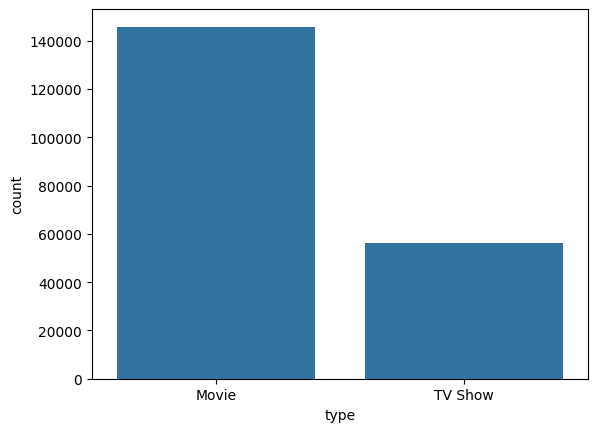

type
Movie      145788
TV Show     56148
Name: count, dtype: int64

In [13]:
sns.countplot(x='type', data=netdata)
plt.show()
netdata['type'].value_counts()

**Visual Analysis:
Unique and Value Counts: Out of 2L rows, 145788 are movies and 56148 are TV shows**

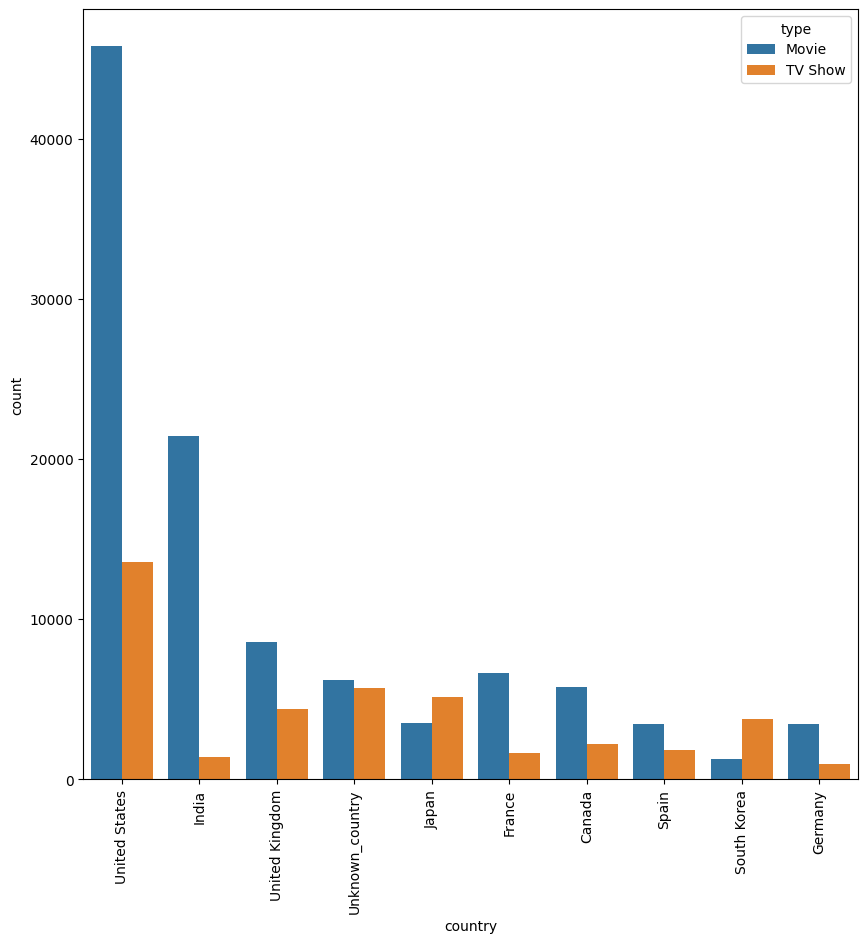

In [14]:
plt.figure(figsize=(10,10))
top10_country = netdata['country'].value_counts().index[:10]
top10_data = netdata.loc[netdata["country"].isin(top10_country)]
sns.countplot(x='country', hue='type', order=top10_data['country'].value_counts().index, data=top10_data)
plt.xticks(rotation=90)
plt.show()



**From the above graph its clear that United states produce more number of movies and TV shows.
INDIA is the second country to produce more number of movies and TV shoes but India produce more number of movies than TV shows.**

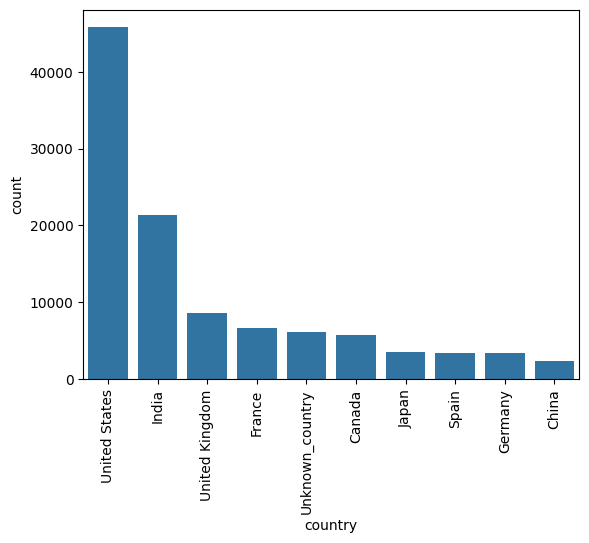

In [15]:
movies_data = netdata.loc[netdata['type'] =='Movie']
top10_mov_country = movies_data.groupby('country')['title'].nunique().sort_values(ascending=False).index[:10]
top10_mov_countrydata = movies_data.loc[movies_data['country'].isin(top10_mov_country)]
top10_mov_countrydata
sns.countplot(x='country', order=top10_mov_countrydata['country'].value_counts().index, data=top10_mov_countrydata)
plt.xticks(rotation=90)
plt.show()


**From above graph its clear that United states have highest movie production
Second is India in movies**

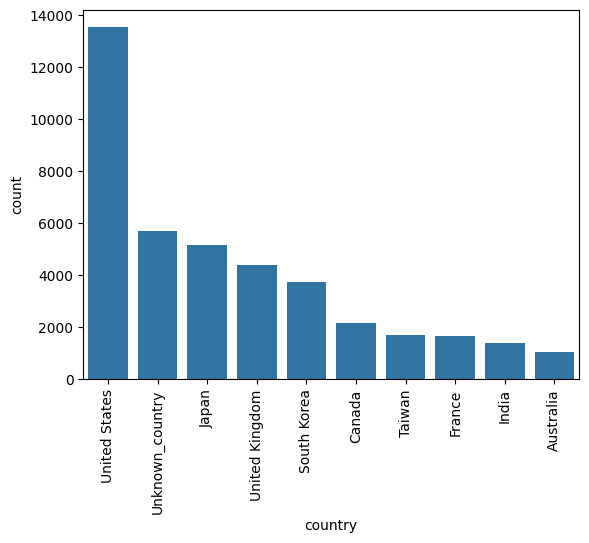

In [16]:
tvshow_data = netdata.loc[netdata['type'] =='TV Show']
top10_mov_country = tvshow_data.groupby('country')['title'].nunique().sort_values(ascending=False).index[:10]
top10_mov_countrydata = tvshow_data.loc[tvshow_data['country'].isin(top10_mov_country)]
top10_mov_countrydata
sns.countplot(x='country', order=top10_mov_countrydata['country'].value_counts().index, data=top10_mov_countrydata)
plt.xticks(rotation=90)
plt.show()

**From above graph its clear that united states have highest TV shows and Japan is next country with highest TV shoes excluding the unknown_country which is missing data**

<ipython-input-17-19b7d375b7f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['Month_released'] = movies_data['date_added'].apply(lambda x: x.split(' ')[0])


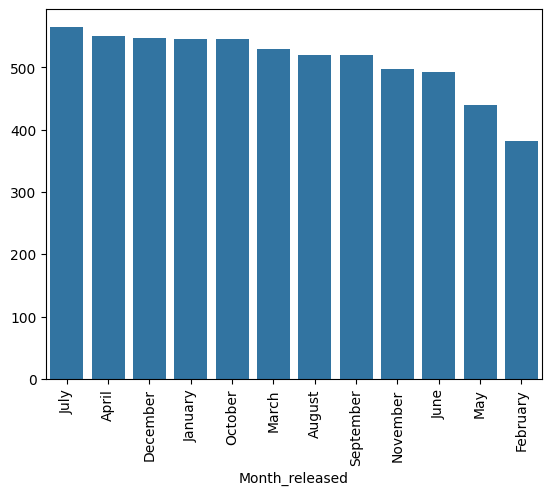

In [17]:
# 3. Best time to launch
netdata.head(10)
movies_data['Month_released'] = movies_data['date_added'].apply(lambda x: x.split(' ')[0])
movies_by_month = movies_data.groupby('Month_released')['title'].nunique().sort_values(ascending=False)
sns.barplot(x=movies_by_month.index, y=movies_by_month.values)
plt.xticks(rotation=90)
plt.show()

**Insights: Highest number of movies are released in the month of July.
Recommendation - Less number of movies released in Febrauary. Releasing more number of new movies in Febrauary or May might help the reach.**

<ipython-input-26-26ec518bd1a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshow_data['Month_released'] = tvshow_data['date_added'].apply(lambda x: x.split(' ')[0])


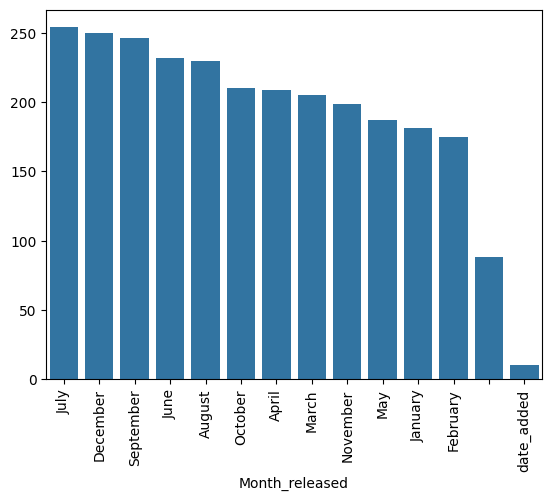

In [26]:
tvshow_data['Month_released'] = tvshow_data['date_added'].apply(lambda x: x.split(' ')[0])
tvshow_by_month = tvshow_data.groupby('Month_released')['title'].nunique().sort_values(ascending=False)
sns.barplot(x=tvshow_by_month.index, y=tvshow_by_month.values)
plt.xticks(rotation=90)
plt.show()

**Insights - Most number of TV shows released in July and December
Recommendations - Less number of TV shows released in January and Febrauary. Releasing more TV shows in beginning of the year(Jan/Feb) might increase the views.**

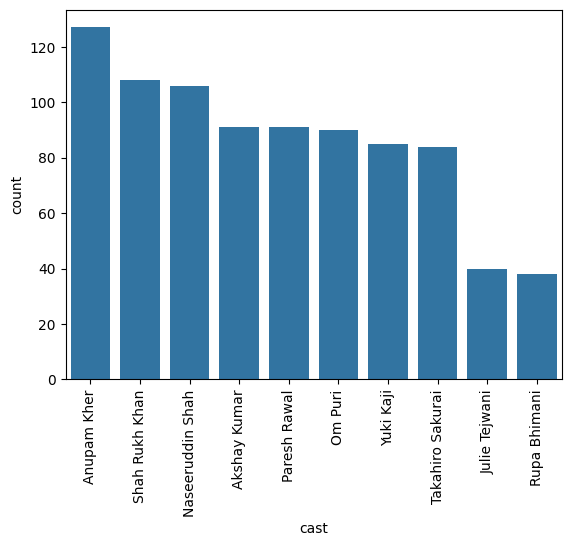

In [27]:
# 4. Analysis of actors/directors of different types of shows/movies.

top10_cast  = netdata.groupby('cast')['title'].nunique().sort_values(ascending=False).index[1:11]
top10_castdata = netdata.loc[netdata['cast'].isin(top10_cast)]
sns.countplot(x='cast', order=top10_castdata['cast'].value_counts().index, data=top10_castdata)
plt.xticks(rotation=90)
plt.show()

**Insights - Anupam Kher is the cast in most of the movies/TV shows. Shah Rukh Khan is the next cast who acted in most of the movies.
Recommendations - Movies with casts who have highest number of movies released shouls be released in the month of January / febrauary to increase the views and subscribers**

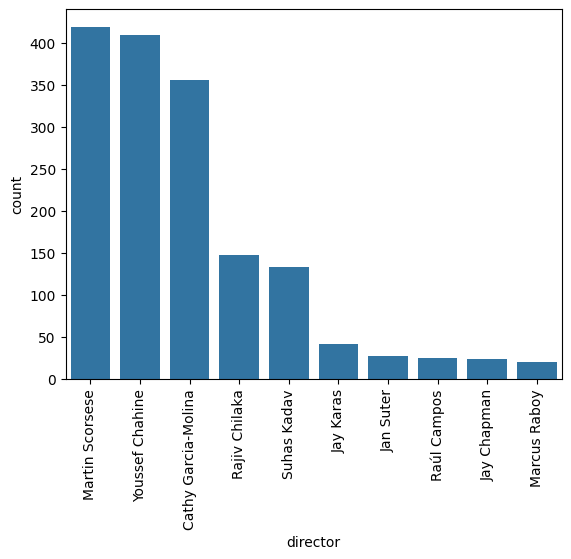

In [ ]:
top10_dir  = netdata.groupby('director')['title'].nunique().sort_values(ascending=False).index[1:11] # Excluding first one as its Unknown_director
top10_dirdata = netdata.loc[netdata['director'].isin(top10_dir)]
sns.countplot(x='director', order=top10_dirdata['director'].value_counts().index, data=top10_dirdata)
plt.xticks(rotation=90)
plt.show()

**Insights - Most of the movies are directed by Martin, Youssef nad Cathy.
Recommendations - Give promotional offers for other directors to release them in netflix**

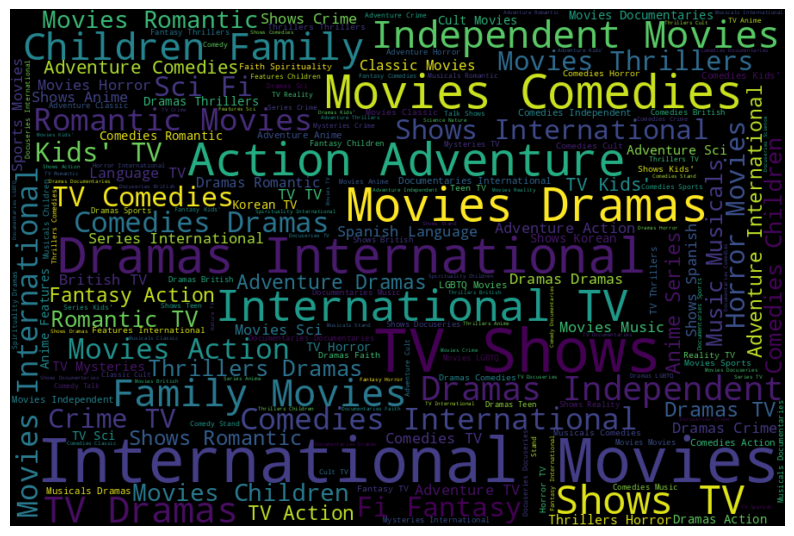

In [ ]:
text = ', '.join(netdata['listed_in'])
wc_text = wc(width=900, height=600, random_state=21,).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc_text, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


**Insights - Movies with Genre Movies comedies, Drama, International movies are mostly released on Netflix. Recommandations - Promote other kinds of movies like Kids TV, Family movies by giving special offers to release on netflix**

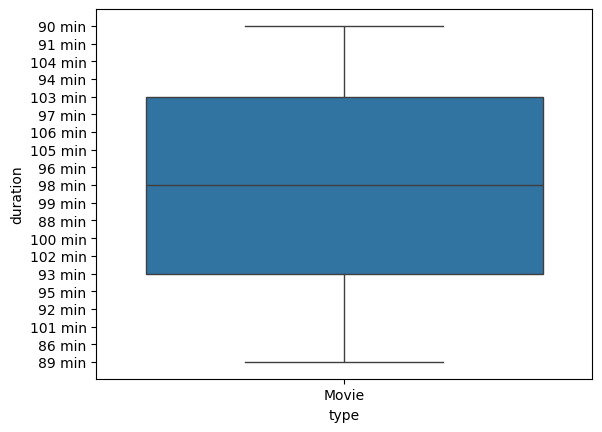

In [51]:
top20_mov_dur = movies_data.groupby('duration')['title'].nunique().sort_values(ascending=False).index[:20]
top20_mov_dur_data = movies_data.loc[movies_data['duration'].isin(top20_mov_dur)]
sns.boxplot(x='type', y='duration', data = top10_mov_dur_data)
plt.show()

**Insights - Movies with 94, 97 and 95 mins duration are mostly telecasted in netflix. Movies 98mins is average number of movies telecasted. Recommandations - Try to promote movies with less watch time to have more users watch**